In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random

In [12]:
class multi_armed_bandit:
    def __init__(self, k):
        self.k = k
        self.actions = np.full(self.k, 0)
        self.qn = np.zeros(self.k)
        self.true_rewards =  np.zeros(self.k)
        
    def random_walks(self):
        self.true_rewards += np.random.normal(0,0.01,self.k)
        
    def increment_method(self, i, alpha):
        self.qn = self.qn + alpha*(self.true_rewards[i] - self.qn[i])
        
    def sampled_average(self):
        pass

ValueError: x and y must have same first dimension, but have shapes (10001,) and (2000,)

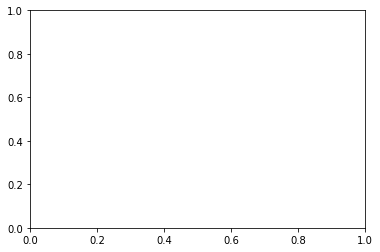

In [13]:
all_rewards, all_optimal_actions = [], []

for _ in range(2000):
    testbed = multi_armed_bandit(10)
    
    r = []
    op = 0
    
    for i in range(10001):
        a = 1/(i+1)
        alpha = 0.1
        epsilon = 0
        
        action_taken = np.random.randint(testbed.k) if(random.random() < epsilon) else np.argmax(testbed.qn)
        reward = testbed.true_rewards[action_taken]
        
        r.append(reward)
        
        testbed.increment_method(action_taken, alpha)
        testbed.random_walks()
        optimal_action = np.argmax(testbed.qn)
        
    if(action_taken == np.argmax(testbed.true_rewards)):
        op+=1
    
    all_rewards.append(r)
    all_optimal_actions.append(op/20)

avg_reward = np.mean(all_rewards, 0)

plt.plot(range(0,10001,1), all_optimal_actions)